<a href="https://colab.research.google.com/github/yeonghun00/real-estate/blob/main/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

상승신호

- House Price Index 전고점 돌파 (서울 기준, 지역마다 다름)
- 거래량 저점 찍고 상승세 (1년 이상)
- 미분양 고점 찍고 감소세 (1년 이상)
- 인허가 고점 찍고 감소세 (1년 이상)
- 아파트 단지별 전세가율 역사적 최고와 비교


- 거래량/가격동향 => 성장 지역
- 주택연령별 => 리모델링/재건축 인기도
- 주택크기별 => 끝물, 대형주택 인기도

In [ ]:
# korean font
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip'
!unzip "NotoSansCJKkr-hinted.zip"
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

--2022-11-11 07:01:11--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  99.2MB/s    in 1.2s    

2022-11-11 07:01:13 (99.2 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: NotoSansCJKkr-Thin.

거래량

In [ ]:
from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
font_manager.fontManager.addfont(font_fname)
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)
font_manager._rebuild()

*   합계
*   관할시군구내 : 해당 시군구 거주자 동일 지역 거래 (실소유)
*   관할시도내 : 해당 시도 거주자 동일 지역 거래 (실소유)
*   관할시도외_서울 : 서울 거주자 해당 지역 걸래 (투자)
*   관할시도외_기타 : 서울 외 거주자 해당 지역 거래 (투자)




In [ ]:
import pandas as pd
import requests

url = 'https://www.reb.or.kr/r-one/statistics/excelDownLoadAllType2.do?statCd=LHT_64040&lhtSubGbn=06&dealObj=04&category=&landSrchGbn=CNT&researchDate=&regionCd' #데이터 전부
response = requests.get(url, headers ={'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'})

In [ ]:
import io
data = response.content
data = io.BytesIO(data)
df = pd.read_excel(data)

In [ ]:
df.columns = df.iloc[9]
df = df[10:]
df = df.T.ffill().T.ffill()
df = df.replace('-', 0)

In [ ]:
from datetime import datetime
df = df.rename(columns=dict(zip(df.columns[4:], [datetime.strptime(x, '%Y년 %m월') for x in df.columns[4:]])))

In [ ]:
c = df.iloc[:, [0,1,2]]
c.columns = ['시도', '시군','구']
loc = ['_'.join(list(dict.fromkeys(([c.loc[x][y] for y in ['시도', '시군', '구']])))) for x in c.index]

In [ ]:
df = df.iloc[: , 3:]
df.insert(loc=0, column='지역', value=loc)
df.head()

9,지역,매입자거주지,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,...,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00
10,전국,합계,77173.0,103718.0,133120.0,118127.0,121835.0,108639.0,91636.0,83938.0,...,101766.0,87825.0,85733.0,89915.0,104380.0,96979.0,88166.0,65921.0,72603.0,57103.0
11,전국,관할시군구내,43355.0,59383.0,73160.0,64991.0,63991.0,56417.0,46492.0,42607.0,...,47739.0,41755.0,45126.0,43043.0,49105.0,44602.0,42941.0,32601.0,37396.0,28956.0
12,전국,관할시도내,19608.0,25040.0,34088.0,29980.0,32173.0,30089.0,25484.0,22413.0,...,25605.0,24027.0,19147.0,22748.0,27480.0,23539.0,22868.0,16160.0,17133.0,14225.0
13,전국,관할시도외_서울,4914.0,6438.0,9656.0,8250.0,9444.0,7880.0,7360.0,6990.0,...,8229.0,6729.0,5892.0,6135.0,8126.0,8222.0,6140.0,4123.0,5574.0,3701.0
14,전국,관할시도외_기타,9296.0,12857.0,16216.0,14906.0,16227.0,14253.0,12300.0,11928.0,...,20193.0,15314.0,15568.0,17989.0,19669.0,20616.0,16217.0,13037.0,12500.0,10221.0


In [ ]:
city = '서울'
loc = set(df[df['지역'].str.contains(city)]['지역'])
loc.remove(city)

In [ ]:
def get_data(loc=['전국'], buyer=['합계'], rank=10):
  if type(loc) == str : loc = [loc]
  if type(buyer) == str : buyer = [buyer]
  t = df.loc[df['지역'].isin(loc)]
  t = t.loc[t['매입자거주지'].isin(buyer)]
  t = t.rename(index=dict(zip((t['지역'] + '_' + t['매입자거주지']).index, (t['지역'] + '_' + t['매입자거주지']))))
  t = t.drop(columns=['지역', '매입자거주지'])
  r = t.sum(axis=1).sort_values(ascending=False).index[:rank]
  return t.loc[r].T

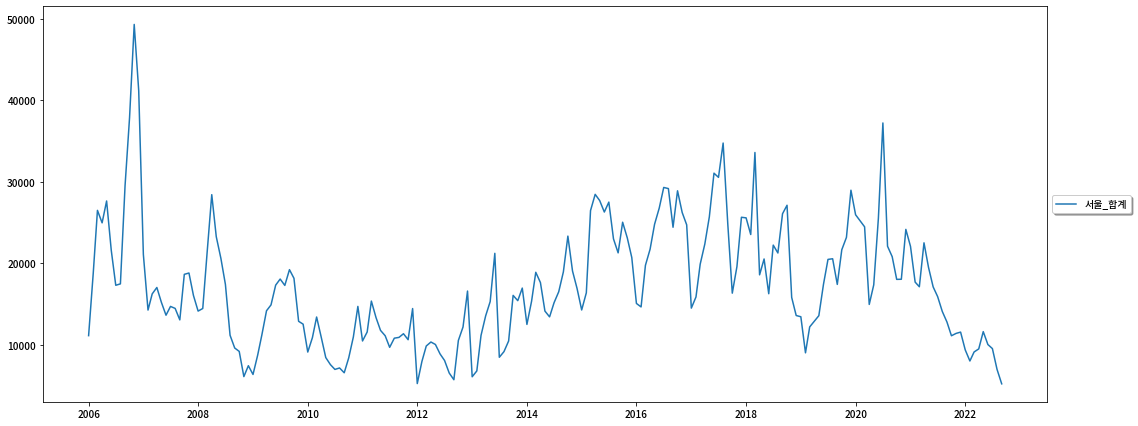

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(2, 1, 1)

data = get_data('서울', '합계')
plt.plot(data)
ax.legend(data, loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

plt.show()

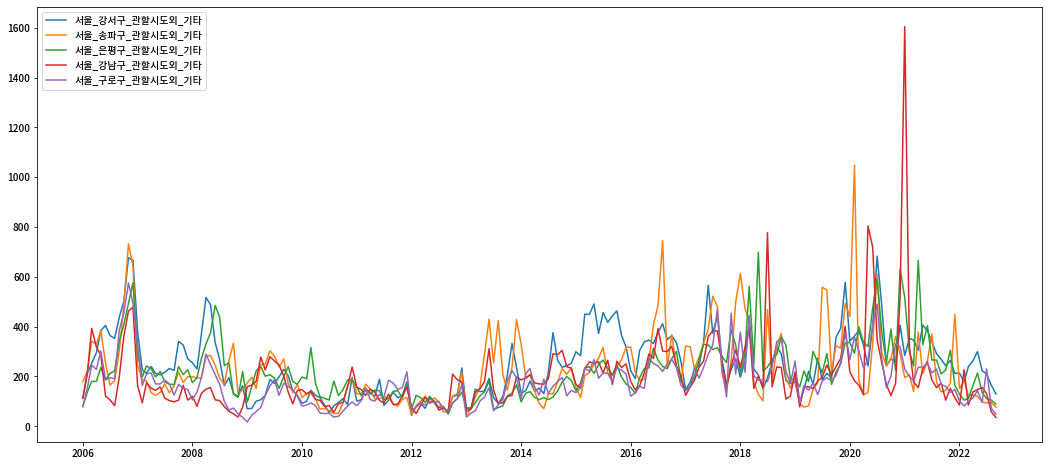

In [ ]:
import matplotlib.pyplot as plt

city = '서울'
loc = set(df[df['지역'].str.contains(city)]['지역'])
loc.remove(city)
data = get_data(loc, ['관할시도외_기타'], 5)

plt.figure(figsize=(18,8))
plt.plot(data)
plt.legend(data)
plt.show()

In [ ]:
rank = pd.DataFrame({data.iloc[-1-x].name : data.iloc[-1]/data.iloc[-1-x].sort_values() for x in [1,3,6,12,24]})
rank

,2022-08-01,2022-06-01,2022-03-01,2021-09-01,2020-09-01
서울_강남구_관할시도외_기타,0.603448,0.224359,0.411765,0.202312,0.209581
서울_강서구_관할시도외_기타,0.787879,0.582960,0.543933,0.483271,0.534979
서울_구로구_관할시도외_기타,0.666667,0.500000,0.484848,0.285714,0.309677
서울_송파구_관할시도외_기타,0.802083,0.785714,0.626016,0.557971,0.318182
서울_은평구_관할시도외_기타,0.847619,0.659259,0.794643,0.423810,0.346304


In [ ]:
rank.iloc[:, 0].sort_values()

서울_강남구_관할시도외_기타    0.603448
서울_구로구_관할시도외_기타    0.666667
서울_강서구_관할시도외_기타    0.787879
서울_송파구_관할시도외_기타    0.802083
서울_은평구_관할시도외_기타    0.847619
Name: 2022-08-01 00:00:00, dtype: float64

- 거래량 총합 많은 순만 뽑아오기
- 저거 레전드 위치 좀 맵플롯도 깔끔하게
- 연도별 합
- 서브 df 뽑아오는거 좀 더 이쁜 함수로 만들기

미분양 현황

https://stat.molit.go.kr/portal/cate/statView.do?hRsId=32&hFormId=2082&hSelectId=2086&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=2082&sStart=2001&sEnd=2021&sStyleNum=713&sDivEng=N&EXPORT=

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 시·군·구별+미분양현황_2082_128_20221110225033.csv to 시·군·구별+미분양현황_2082_128_20221110225033.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded)[0]]))

In [ ]:
df = df.sort_values(by='월(Monthly)')
df.index = [datetime.strptime(x, '%Y-%m') for x in df['월(Monthly)']]
df.drop(columns=['증감','증감율','구성비','누계','누계구성비','LEVEL1', '월(Monthly)'], inplace=True)

In [ ]:
df

,구분,시군구,값
2000-12-01,제주,계,739.0
2000-12-01,전국,계,58550.0
2000-12-01,서울,계,3037.0
2000-12-01,부산,계,6046.0
2000-12-01,대구,계,2944.0
...,...,...,...
2022-09-01,경기,부천시,162.0
2022-09-01,경기,광명시,0.0
2022-09-01,경기,평택시,1329.0
2022-09-01,경기,안산시,0.0


In [ ]:
# 2007년 부터 데이터로
df = df.fillna(0)
df = df.bfill()
df = df[df.index > '2007-01']

In [ ]:
all_data = df[df['시군구'] == '계'].groupby(level=0).sum() 

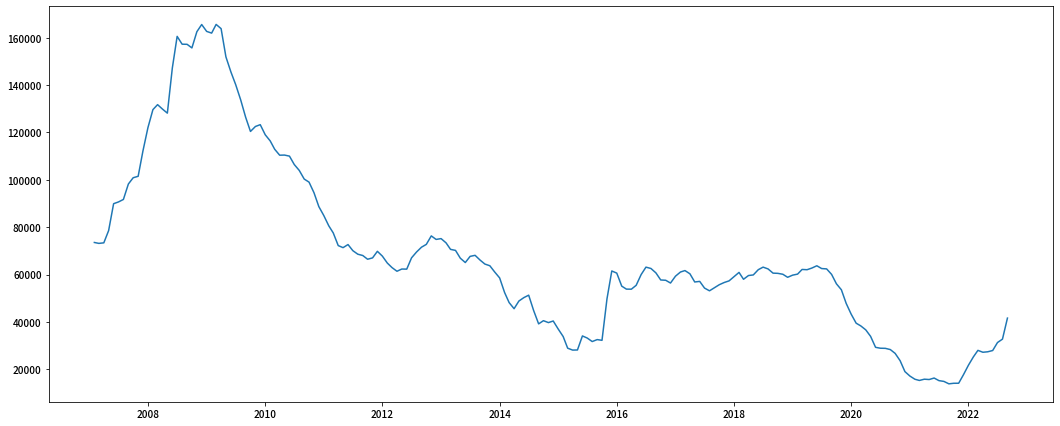

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(2, 1, 1)
ax.plot(all_data)

plt.show()

In [ ]:
def get_city_data(city=['경기'], start_date = '2007-01-01', trend=False):
  dic = {}
  for i in city:
    dic[i] = df[(df['구분'] == i) & (df['시군구'] == '계')]['값']
  city_data = pd.concat(dic, axis=1)[start_date:]
  # trend
  if trend==True: city_data = city_data/city_data.iloc[0]
  return city_data

In [ ]:
city_data = get_city_data(df['구분'].unique(), start_date = '2016-01-01')

In [ ]:
city_data

,경기,울산,대전,광주,강원,인천,부산,서울,대구,경북,전남,제주,경남,충남,충북,전북,세종
2016-01-01,24276.0,857.0,1038.0,672.0,2264.0,4036.0,1308.0,737.0,1806.0,3725.0,1563.0,119.0,3353.0,8530.0,5007.0,1311.0,4.0
2016-02-01,20491.0,668.0,866.0,711.0,2271.0,3596.0,1217.0,884.0,1666.0,3490.0,1478.0,55.0,3676.0,8249.0,4341.0,1440.0,4.0
2016-03-01,19047.0,627.0,759.0,764.0,1863.0,3465.0,1251.0,788.0,1769.0,3994.0,1380.0,62.0,4683.0,7823.0,4096.0,1470.0,4.0
2016-04-01,18365.0,593.0,684.0,812.0,2097.0,3329.0,1315.0,651.0,1638.0,3940.0,2017.0,158.0,4221.0,7452.0,4596.0,1945.0,3.0
2016-05-01,17272.0,1609.0,812.0,1049.0,1943.0,3108.0,1253.0,507.0,1462.0,4658.0,1844.0,122.0,5403.0,7869.0,4171.0,2374.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,2449.0,641.0,460.0,46.0,1242.0,426.0,1220.0,688.0,6816.0,5369.0,2327.0,1119.0,1979.0,1386.0,1088.0,107.0,12.0
2022-06-01,3319.0,627.0,523.0,198.0,1303.0,418.0,1267.0,719.0,6718.0,4823.0,2585.0,1063.0,2044.0,1326.0,862.0,103.0,12.0
2022-07-01,3393.0,788.0,509.0,198.0,1239.0,544.0,1503.0,592.0,7523.0,6517.0,2534.0,1227.0,2238.0,1406.0,885.0,178.0,10.0
2022-08-01,3180.0,775.0,668.0,198.0,1348.0,1222.0,1799.0,610.0,8301.0,6693.0,2503.0,1213.0,2042.0,1386.0,619.0,157.0,8.0


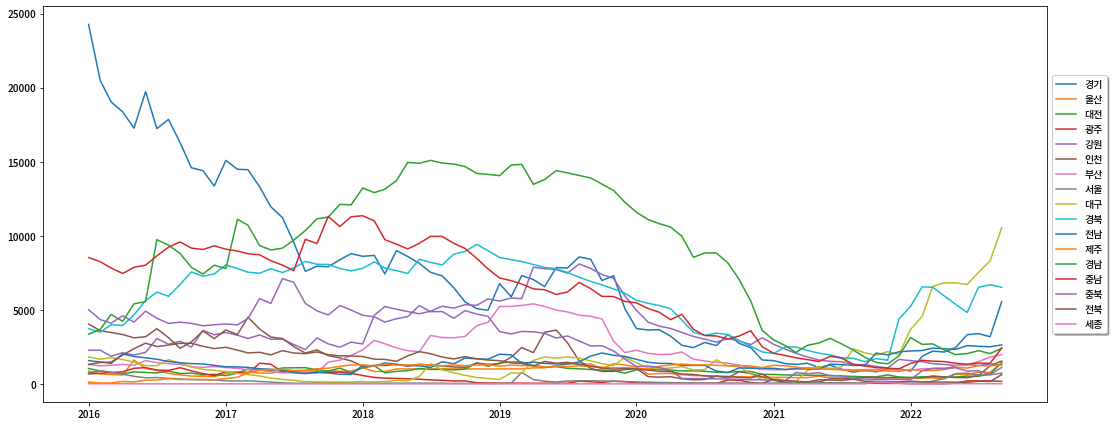

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(2, 1, 1)
ax.plot(city_data)
ax.legend(city_data, loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

plt.show()

In [ ]:
city_data.tail(5).sum().sort_values()

세종       47.0
광주      803.0
전북     1166.0
서울     3328.0
대전     3590.0
인천     4151.0
울산     4257.0
충북     4561.0
제주     5921.0
강원     6394.0
부산     7762.0
충남     7922.0
경남    10704.0
전남    12576.0
경기    17894.0
경북    29922.0
대구    39897.0
dtype: float64

In [ ]:
def get_district_data(city='경기', start_date = '2007-01-01', trend=False):
  dic = {}
  district = df[df['구분']==city]['시군구'].unique()
  for i in district:
    if i =='계': continue
    dic[i] = df[(df['구분'] == city) & (df['시군구'] == i)]['값']
  district_data = pd.concat(dic, axis=1)[start_date:]
  # trend
  if trend==True: district_data = district_data/district_data.iloc[0]
  return district_data

In [ ]:
district_data = get_district_data('경기', '2016-01-01')

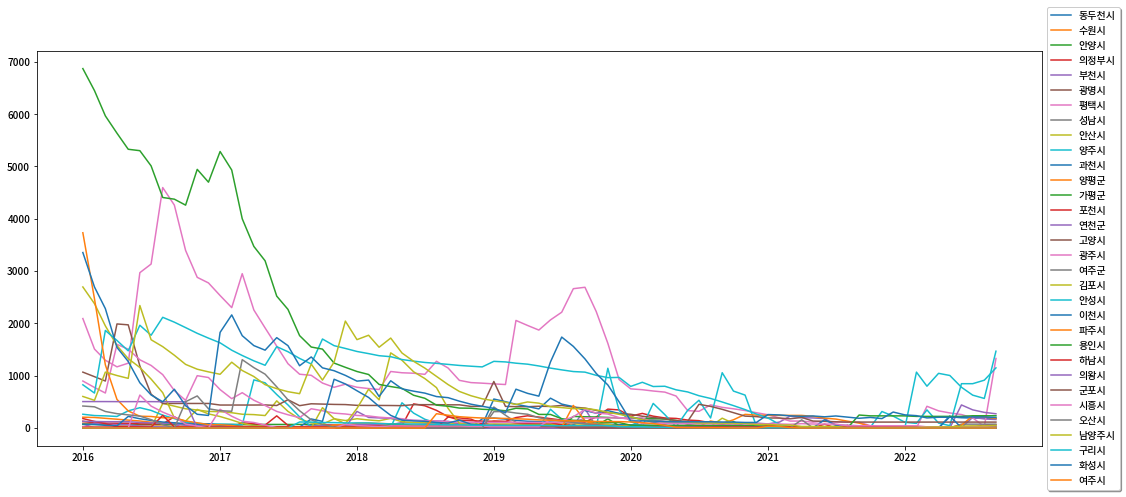

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(2, 1, 1)
ax.plot(district_data)
ax.legend(district_data, loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

plt.show()

In [ ]:
district_data.tail(5).sum().sort_values()

여주시        0.0
수원시        0.0
안양시        0.0
의왕시        0.0
광명시        0.0
여주군        0.0
안산시        0.0
군포시        0.0
과천시        0.0
포천시        0.0
김포시        5.0
파주시        5.0
구리시       10.0
오산시       31.0
가평군       35.0
광주시       46.0
시흥시      107.0
하남시      110.0
의정부시     157.0
남양주시     187.0
이천시      243.0
성남시      296.0
부천시      552.0
고양시      565.0
양평군      690.0
동두천시     973.0
화성시     1036.0
용인시     1146.0
연천군     1359.0
평택시     2095.0
양주시     3802.0
안성시     4444.0
dtype: float64

인허가 실적

https://stat.molit.go.kr/portal/cate/statView.do?hRsId=31&hFormId=626&hSelectId=626&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=626&sStart=2009&sEnd=2021&sStyleNum=125&EXPORT=

In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving 부문별+주택건설+인허가실적_626_125_20221111151115.csv to 부문별+주택건설+인허가실적_626_125_20221111151115.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded2[list(uploaded2)[0]]))

In [ ]:
df = df.sort_values(by='년(Annual)')
df.index = [datetime.strptime(str(x), '%Y') for x in df['년(Annual)']]
df.drop(columns=['증감','증감율','구성비','누계','누계구성비','LEVEL1', '년(Annual)'], inplace=True)

In [ ]:
df = df.fillna(0)
df = df.bfill()

In [ ]:
data = df[(df['시도별'] == '전국') & (df['부문명'] == '총계')]['값']

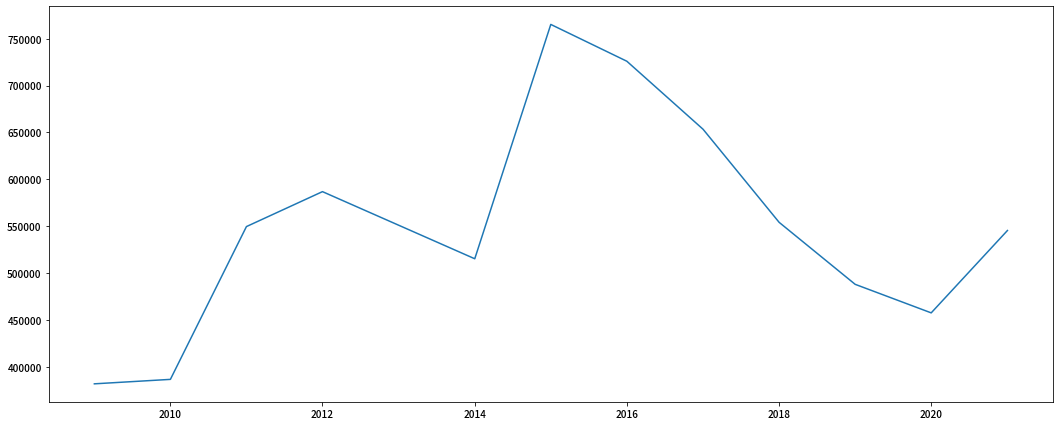

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(2, 1, 1)
ax.plot(data)

plt.show()

In [ ]:
def get_city_consent_data(trend=False):
  dic = {}
  city = df['시도별'].unique()
  for i in city:
    if i=='전국' or i=='수도권': continue
    dic[i] = df[(df['시도별'] == i) & (df['부문명'] == '총계')]['값']
  data = pd.concat(dic, axis=1)
  if trend==True: data = data/data.iloc[0]
  return data 

In [ ]:
city_consent_data = get_city_consent_data(True)

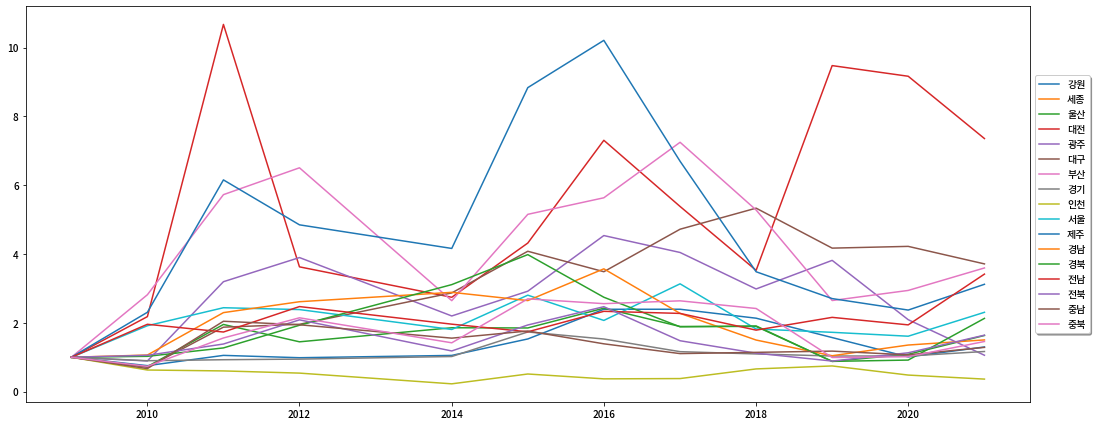

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(2, 1, 1)
ax.plot(city_consent_data)
ax.legend(city_consent_data, loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

plt.show()

In [ ]:
city_consent_data.tail(5).sum().sort_values()

인천     2.639544
경기     5.500981
충남     5.786483
전북     6.262163
울산     7.391350
경남     7.681348
경북     7.724617
강원     8.414311
충북     8.527347
서울    10.601136
전남    11.582814
광주    13.998806
제주    18.380615
부산    21.716569
대구    22.165237
대전    34.910763
세종          inf
dtype: float64